In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import 

In [2]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
B=data.rename(columns={"Sorting Time":'Sorting_Time' ,"Delivery Time":'Delivery_Time'})

In [5]:
B

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
B.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\channu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

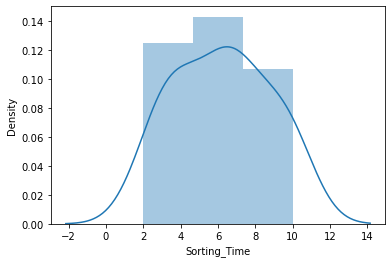

In [8]:
sns.distplot(B['Sorting_Time'])

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit_transform(B.values)


C:\Users\channu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

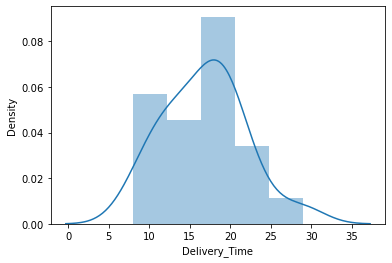

In [10]:
sns.distplot(B["Delivery_Time"])

In [11]:
import statsmodels.formula.api as smf

In [12]:
model=smf.ols("Delivery_Time~Sorting_Time" , data=B).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        15:01:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.pvalues , model.tvalues

(Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64,
 Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64)

Text(0.5, 1.0, 'regression plot')

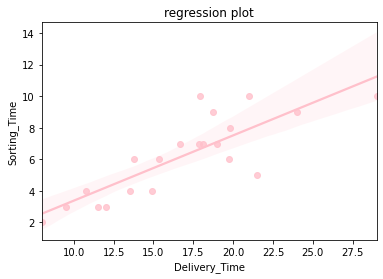

In [15]:
sns.regplot(x='Delivery_Time' , y='Sorting_Time' ,data=B ,color='pink')
plt.title('regression plot')


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        15:01:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
model.rsquared,model.aic

(0.6822714748417231, 106.71400170798609)

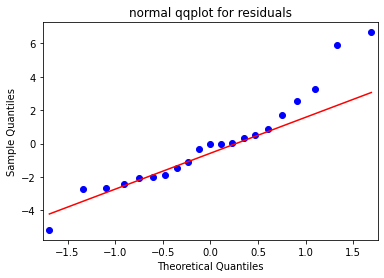

In [19]:
import statsmodels.api as sn
import matplotlib.pyplot as plt
qqplot=sn.qqplot(model.resid,line="q")
plt.title("normal qqplot for residuals")
plt.show()

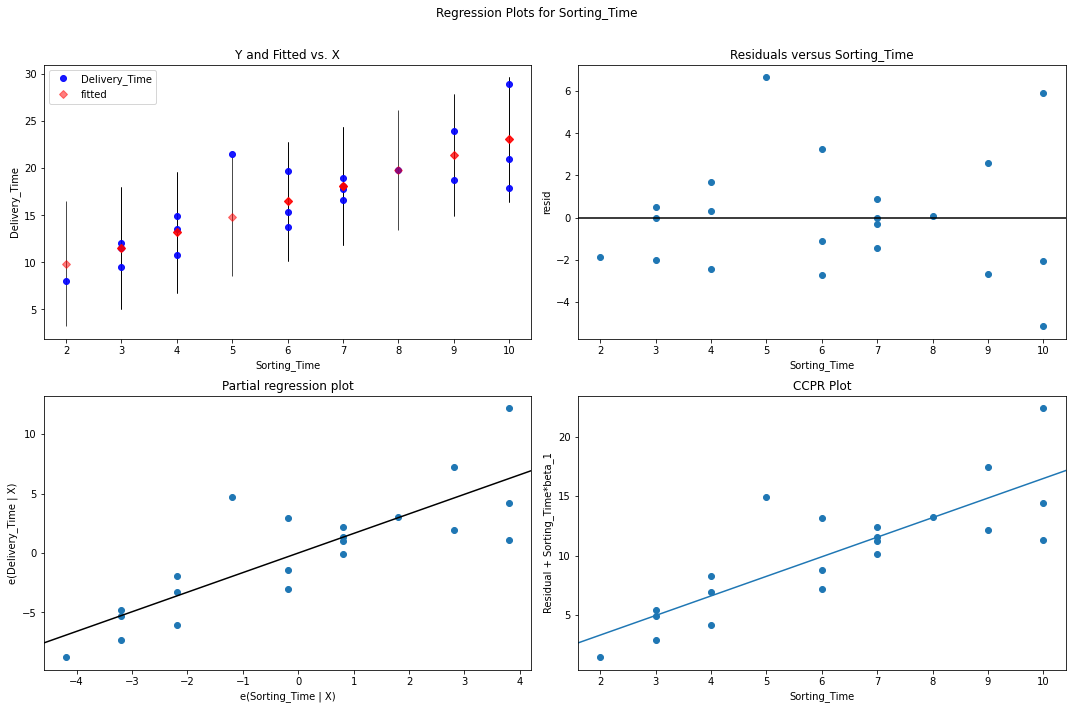

In [20]:
fig =plt.figure(figsize=(15,10))
fig=sn.graphics.plot_regress_exog(model,'Sorting_Time', fig=fig)
plt.show()

In [21]:
model_influence=model.get_influence()
(c,x)=model_influence.cooks_distance

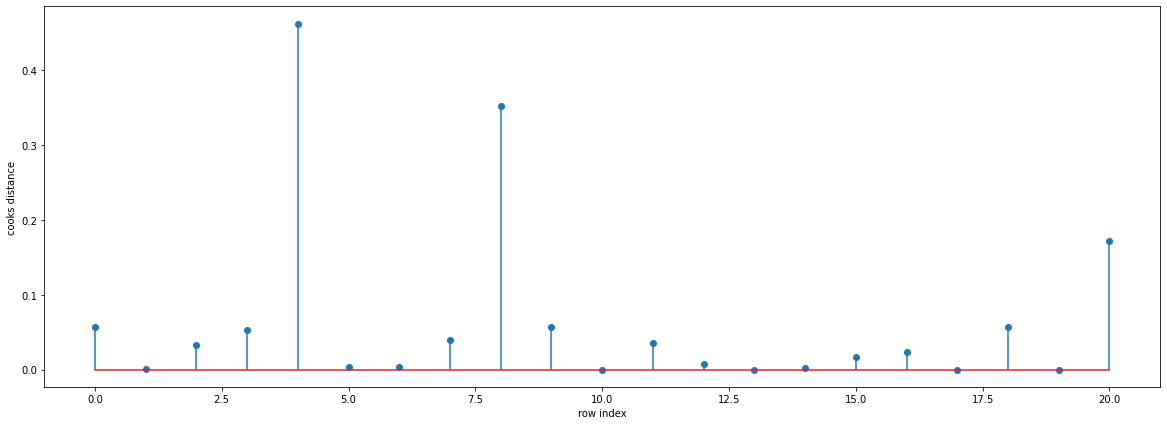

In [22]:
fig=plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(B)) ,np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [23]:
(np.argmax(c) , np.max(c))

(4, 0.4620530412650316)

In [24]:
from statsmodels.graphics.regressionplots import influence_plot

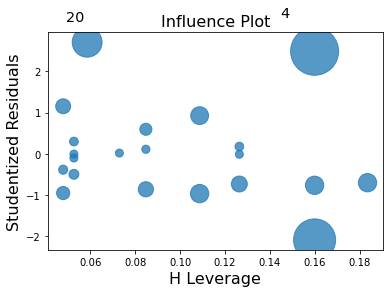

In [25]:
influence_plot(model)
plt.show()

In [26]:
k = B.shape[1]
n = B.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [27]:
k,n,leverage_cutoff

(2, 21, 0.42857142857142855)

In [28]:
B[B.index.isin([4,8,9,20])]

,Delivery_Time,Sorting_Time
4,29.00,10
8,17.90,10
9,18.75,9
20,21.50,5


In [29]:
B.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [30]:
B_new = pd.read_csv("C:\\Users\\channu\\Downloads\\delivery_time.csv")

In [31]:
c_new =B_new.rename(columns={"Delivery Time":'Delivery_Time' , "Sorting Time":"Sorting_Time"})

In [32]:
B1 = c_new.drop(B_new.index[[4,8,20]] ,axis=0).reset_index()

In [33]:
B1 = B1.drop(['index'] , axis=1)
B1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [34]:
final_model=smf.ols("Delivery_Time~Sorting_Time" , data=B1).fit()

In [35]:
final_model.rsquared , final_model.aic

(0.8332330202945817, 74.89939393823053)

In [36]:
final_model.rsquared 

0.8332330202945817

In [57]:
testdata=pd.Series([5,6,7,8,9])
final_data_pred=pd.DataFrame(testdata,columns=['Sorting_Time'])
final_model.predict(final_data_pred)

0    14.394381
1    16.068457
2    17.742533
3    19.416609
4    21.090685
dtype: float64

In [58]:
final_model.rsquared

0.8332330202945817

## 2 nd question salary hike

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [38]:
data=pd.read_csv("C:\\Users\\channu\\Downloads\\Salary_Data.csv")

In [39]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [40]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\channu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

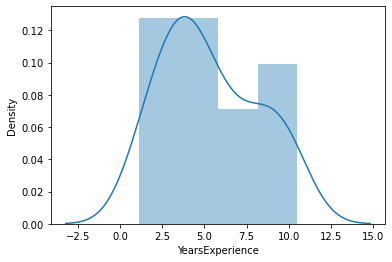

In [41]:
sns.distplot(data['YearsExperience'])

In [42]:
 model=smf.ols("Salary~YearsExperience" , data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

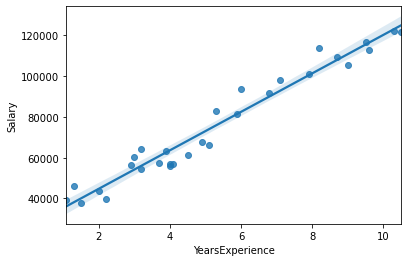

In [43]:
sns.regplot(x='YearsExperience' , y='Salary' , data=data)

In [44]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [45]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [46]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        15:01:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model.rsquared

0.9569566641435086

manual check:

In [ ]:
salary = b0+b1 yearsexperience
*salary=25792.20+9949.96*5
       =73041.99r

In [49]:
import pandas as pd

In [60]:
data_new = pd.Series([5])
data_prediction = pd.DataFrame(data_new,columns=['YearsExperience'])
model.predict(data_prediction)

0    73042.011806
dtype: float64

In [61]:
model.rsquared

0.9569566641435086